In [1]:
from fastai import *
from fastai.vision import *
import cv2
from IPython.display import FileLink

In [2]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [3]:
ddir = Path('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification')

In [4]:
ddir.ls()

[PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/tmp'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test.zip'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train.zip'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/models'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/sample_submission.csv'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png'),
 PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train.csv')]

In [5]:
df_train = pd.read_csv(ddir/'train.csv'); df_train.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [6]:
data = ImageDataBunch.from_df(ddir, df_train, folder='train_png', test='test_png', sep=' ', suffix=".png", size=224, bs=18)

In [7]:
data.normalize(imagenet_stats)

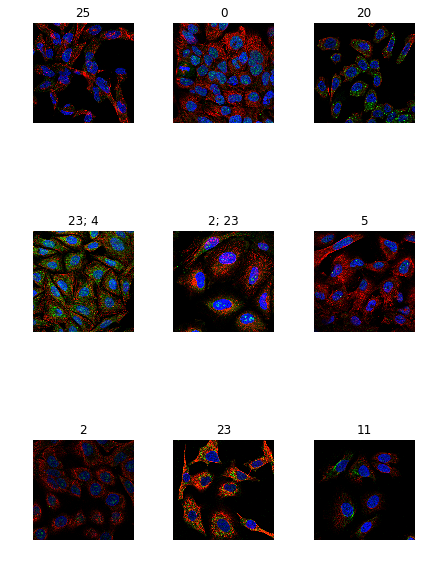

In [8]:
data.show_batch(rows=3, figsize=(6,9))

In [9]:
data.classes

['16',
 '0',
 '7',
 '1',
 '2',
 '5',
 '18',
 '25',
 '23',
 '21',
 '24',
 '6',
 '11',
 '3',
 '12',
 '13',
 '14',
 '4',
 '20',
 '22',
 '17',
 '19',
 '8',
 '9',
 '10',
 '26',
 '27',
 '15']

In [10]:
fbeta = Fbeta()

In [11]:
learn = create_cnn(data, models.resnet34, metrics=fbeta)

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,fbeta
